In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib

### 1. Cargar datos

In [55]:
df = pd.read_csv('penguins_v1.csv')
print(f"Dimensiones del dataset: {df.shape}")

df.head()

Dimensiones del dataset: (333, 9)


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,1,1,39.1,18.7,181,3750,1,2007
1,2,1,1,39.5,17.4,186,3800,0,2007
2,3,1,1,40.3,18.0,195,3250,0,2007
3,5,1,1,36.7,19.3,193,3450,0,2007
4,6,1,1,39.3,20.6,190,3650,1,2007


### 2. Limpieza de datos

In [56]:
# valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# duplicados
print(f"\nFilas duplicadas: {df.duplicated().sum()}")

# Información del dataset
print("\nInformación del dataset:")
df.info()

Valores nulos por columna:
id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

Filas duplicadas: 0

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 333 non-null    int64  
 1   species            333 non-null    int64  
 2   island             333 non-null    int64  
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    int64  
 6   body_mass_g        333 non-null    int64  
 7   sex                333 non-null    int64  
 8   year               333 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 23.5 KB


### 3. Transform - Transformación de datos

In [57]:
# Eliminar la columna 'id' ya que no aporta información para el modelo
df_clean = df.drop('id', axis=1)

# Separar species de los features
X = df_clean.drop('species', axis=1)
y = df_clean['species']

print(f"\nDistribución de clases:")
print(y.value_counts())


Distribución de clases:
species
1    146
2    119
3     68
Name: count, dtype: int64


### 4. Validación de datos

In [58]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de las características:")
print(X.describe())

Estadísticas descriptivas de las características:
           island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  333.000000      333.000000     333.000000         333.000000   
mean     2.228228       43.992793      17.164865         200.966967   
std      0.678088        5.468668       1.969235          14.015765   
min      1.000000       32.100000      13.100000         172.000000   
25%      2.000000       39.500000      15.600000         190.000000   
50%      2.000000       44.500000      17.300000         197.000000   
75%      3.000000       48.600000      18.700000         213.000000   
max      3.000000       59.600000      21.500000         231.000000   

       body_mass_g         sex         year  
count   333.000000  333.000000   333.000000  
mean   4207.057057    0.504505  2008.042042  
std     805.215802    0.500732     0.812944  
min    2700.000000    0.000000  2007.000000  
25%    3550.000000    0.000000  2007.000000  
50%    4050.000000    1.000000  20

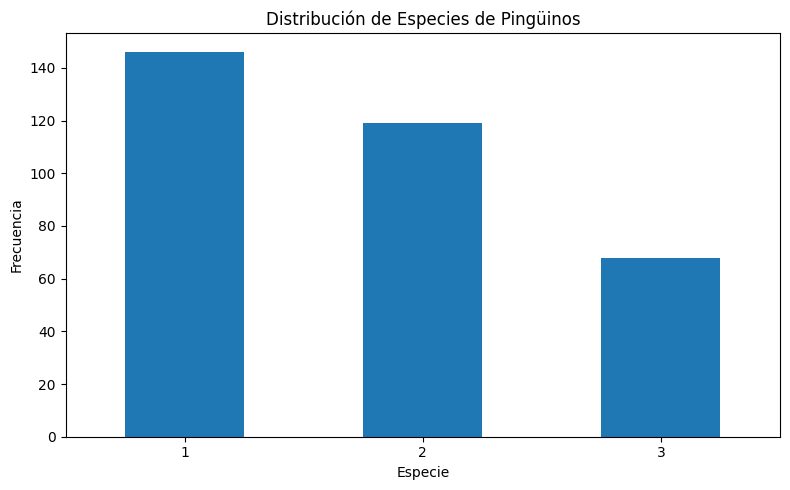

In [59]:
# Visualizar distribución de la variable objetivo
plt.figure(figsize=(8, 5))
y.value_counts().plot(kind='bar')
plt.title('Distribución de Especies de Pingüinos')
plt.xlabel('Especie')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

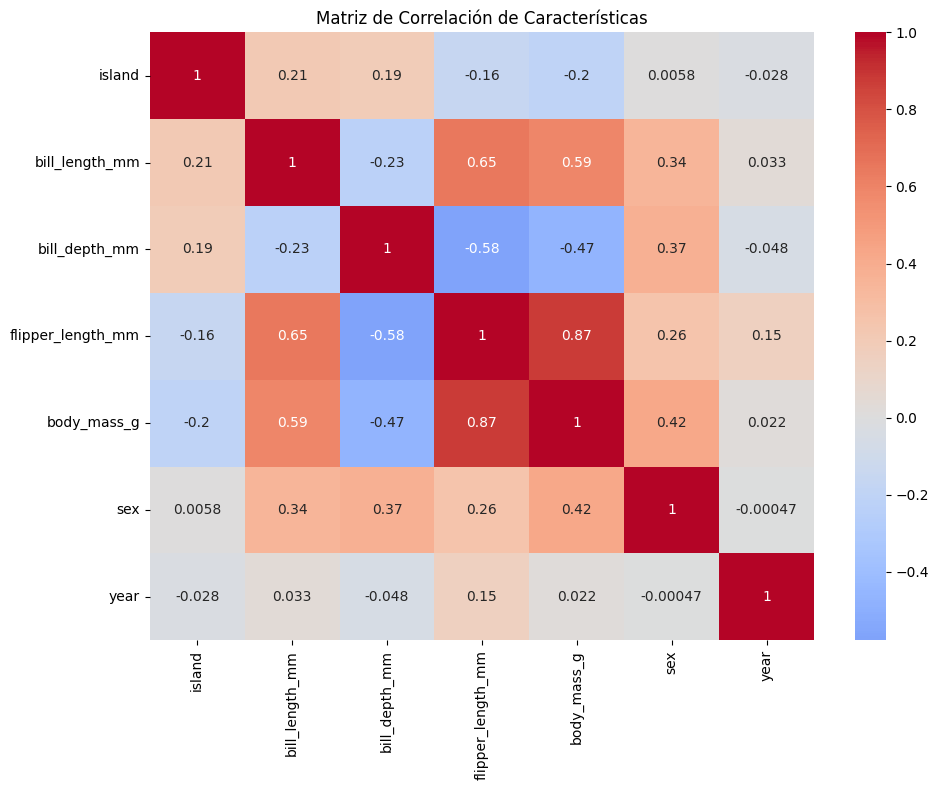

In [60]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Características')
plt.tight_layout()
plt.show()

### 5. Feature Engineering

In [61]:
X['bill_ratio'] = X['bill_length_mm'] / X['bill_depth_mm']
X['body_mass_kg'] = X['body_mass_g'] / 1000

print("Nuevas características creadas:")
print(X[['bill_ratio', 'body_mass_kg']].head())
print(f"\nDimensiones finales de X: {X.shape}")

Nuevas características creadas:
   bill_ratio  body_mass_kg
0    2.090909          3.75
1    2.270115          3.80
2    2.238889          3.25
3    1.901554          3.45
4    1.907767          3.65

Dimensiones finales de X: (333, 9)


### 6. División de datos

In [62]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")
print(f"\nDistribución en entrenamiento:")
print(y_train.value_counts())
print(f"\nDistribución en prueba:")
print(y_test.value_counts())

Conjunto de entrenamiento: (266, 9)
Conjunto de prueba: (67, 9)

Distribución en entrenamiento:
species
1    117
2     95
3     54
Name: count, dtype: int64

Distribución en prueba:
species
1    29
2    24
3    14
Name: count, dtype: int64


### 7. Construcción del modelo

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

svm_model = SVC(
    kernel='rbf',
    C=1.0,
    random_state=42
)

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

### 8. Entrenamiento de los modelos

In [64]:
models = {
    'RandomForest': rf_model,
    'SVM': svm_model,
    'GradientBoosting': gb_model
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

### 9. Validación de los modelos

--- RandomForest ---
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        29
           2       1.00      1.00      1.00        24
           3       1.00      0.93      0.96        14

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.98        67



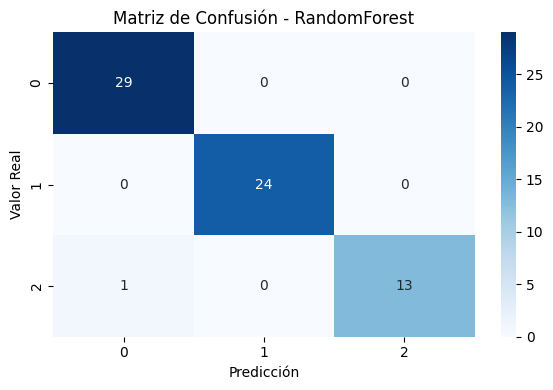

--- SVM ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        14

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



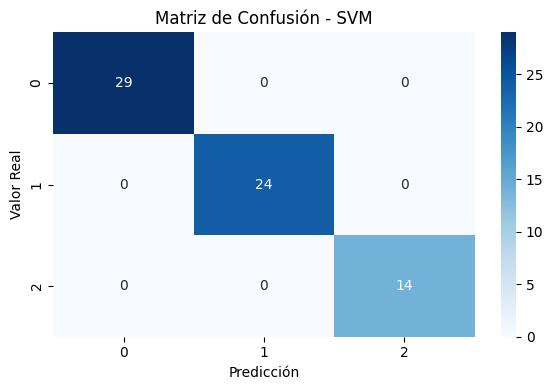

--- GradientBoosting ---
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        29
           2       1.00      1.00      1.00        24
           3       1.00      0.93      0.96        14

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.98        67



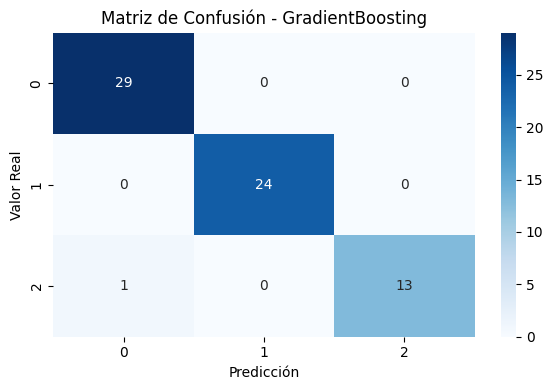

,model,train_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,RandomForest,1.0,0.985075,0.985572,0.985075,0.984925
1,SVM,1.0,1.000000,1.000000,1.000000,1.000000
2,GradientBoosting,1.0,0.985075,0.985572,0.985075,0.984925


In [65]:
metrics_list = []

for name, model in models.items():
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    metrics_list.append({
        'model': name,
        'train_accuracy': accuracy_score(y_train, y_train_pred),
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'test_precision': precision_score(y_test, y_test_pred, average='weighted'),
        'test_recall': recall_score(y_test, y_test_pred, average='weighted'),
        'test_f1': f1_score(y_test, y_test_pred, average='weighted')
    })

    print(f'--- {name} ---')
    print(classification_report(y_test, y_test_pred))

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.ylabel('Valor Real')
    plt.xlabel('Predicción')
    plt.tight_layout()
    plt.show()

df_metrics = pd.DataFrame(metrics_list)
df_metrics

### 10. Guardar modelos y métricas

In [66]:
import os

os.makedirs('../API/modelos', exist_ok=True)
os.makedirs('../API/report', exist_ok=True)

for name, model in models.items():
    joblib.dump(model, f'../API/modelos/{name.lower()}_model.pkl')

joblib.dump(scaler, '../API/modelos/scaler.pkl')
df_metrics.to_pickle('../API/report/model_metrics.pkl')